## BDT Data Science Challenge
A few brave coders are going to try to achieve top results by applying their top ideas and algorithms.

Get the dataset for the BDT Data Science Challenge on June 12-13 weekend.


In [5]:
!curl https://raw.githubusercontent.com/nuwe-io/bdt_hackathon/main/particles.csv > ./particles.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.5M  100 16.5M    0     0  20.5M      0 --:--:-- --:--:-- --:--:-- 20.4M


In [6]:
import pandas as pd
df = pd.read_csv('particles.csv')
df.head()

,alpha_1,alpha_2,alpha_3,beta_1,beta_2,beta_3,gamma_1,gamma_2,gamma_3,theta,noise,Particle
0,NaN,-59.730861,396.928620,9.761703,-137.558889,159.598109,-137.558889,53.930955,154.713810,-232.436087,99.243140,3
1,147.781782,153.729532,111.998962,-174.941235,-97.888332,26.493593,-97.888332,-30.506871,-166.347802,-195.010710,20.242743,0
2,242.220616,82.947635,-102.073856,116.334349,-101.746729,176.452823,-101.746729,-33.419984,44.082548,-173.928682,3.806943,1
3,140.542086,-110.129037,215.560355,-11.927860,-11.257902,21.648833,-11.257902,240.685680,133.441269,-276.382025,0.336025,0
4,169.367809,-92.182925,159.995515,-272.230740,-80.483153,-97.698901,-80.483153,16.251613,-13.177148,-100.316959,24.459551,0


In [42]:
desc_df = df.describe().T ; desc_df

,count,mean,std,min,25%,50%,75%,max
alpha_1,109132.0,-10.713873,152.987128,-779.841923,-118.765902,-0.787086,101.815933,698.044837
alpha_2,127321.0,-0.270224,100.044696,-391.102365,-68.036224,-0.112444,66.895676,444.209708
alpha_3,127321.0,49.546923,221.503776,-1263.945127,-102.428650,48.483502,198.157415,1383.265329
beta_1,127321.0,7.508049,164.993428,-701.930722,-109.328232,6.053932,123.154096,666.078562
beta_2,127131.0,46.853638,160.134335,-655.626984,-59.311413,55.785954,155.939039,726.063419
beta_3,127206.0,0.451485,99.979061,-448.118855,-66.838936,0.571383,67.675433,448.925730
gamma_1,127321.0,46.845556,160.142626,-655.626984,-59.320379,55.772838,155.939228,726.063419
gamma_2,126594.0,-0.040888,99.797656,-435.684650,-67.011881,-0.265758,66.893239,544.546234
gamma_3,117897.0,-20.881407,160.637008,-719.937495,-133.157334,-14.309868,95.426099,682.413287
theta,126595.0,-61.594057,146.954921,-653.437102,-158.912087,-75.169482,20.771011,689.548943


In [43]:
desc_df['IQR15'] = (desc_df['75%'] - desc_df['25%']) * 1.5
desc_df['IQR3'] = (desc_df['75%'] - desc_df['25%']) * 3
desc_df

,count,mean,std,min,25%,50%,75%,max,IQR15,IQR3
alpha_1,109132.0,-10.713873,152.987128,-779.841923,-118.765902,-0.787086,101.815933,698.044837,330.872753,661.745505
alpha_2,127321.0,-0.270224,100.044696,-391.102365,-68.036224,-0.112444,66.895676,444.209708,202.397850,404.795700
alpha_3,127321.0,49.546923,221.503776,-1263.945127,-102.428650,48.483502,198.157415,1383.265329,450.879097,901.758193
beta_1,127321.0,7.508049,164.993428,-701.930722,-109.328232,6.053932,123.154096,666.078562,348.723491,697.446982
beta_2,127131.0,46.853638,160.134335,-655.626984,-59.311413,55.785954,155.939039,726.063419,322.875677,645.751355
beta_3,127206.0,0.451485,99.979061,-448.118855,-66.838936,0.571383,67.675433,448.925730,201.771554,403.543109
gamma_1,127321.0,46.845556,160.142626,-655.626984,-59.320379,55.772838,155.939228,726.063419,322.889411,645.778822
gamma_2,126594.0,-0.040888,99.797656,-435.684650,-67.011881,-0.265758,66.893239,544.546234,200.857680,401.715359
gamma_3,117897.0,-20.881407,160.637008,-719.937495,-133.157334,-14.309868,95.426099,682.413287,342.875151,685.750301
theta,126595.0,-61.594057,146.954921,-653.437102,-158.912087,-75.169482,20.771011,689.548943,269.524647,539.049294


In [ ]:
df2 = df.copy()
for col in df2.columns[:-1]:
    df2[col] = map(lambda x: x < desc_df.loc[col, IQR15], df2[col])
df2

In [ ]:
def list_outliers(data, columns, n):
  outliers = []

  for column in columns:
    Q1 = np.percentile(df[columns], 25)[0]
    Q3 = np.percentile(df[columns], 25)[0]
    range = (Q1 - Q3) * 1.5
    outliers.extend(df[df[col] < Q1 - range].index)

  return outliers


In [44]:
df_sin_outliers = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [45]:
df_sin_outliers.shape

(92993, 12)

In [12]:
import seaborn as sns
import numpy as np

## Vamos a por la metodología de @ten

## Imputación de NaNs : KNNImputer / SimpleImputer

In [8]:
from sklearn.impute import SimpleImputer, KNNImputer

In [10]:
X = df.drop('Particle', axis = 1).values
y = df['Particle'].values
X2 = X.copy()


In [13]:
imputer_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X_mean = imputer_mean.fit_transform(X)
X_mean

array([[ -10.71387284,  -59.73086055,  396.9286195 , ...,  154.7138098 ,
        -232.436087  ,   99.24314002],
       [ 147.781782  ,  153.7295321 ,  111.9989619 , ..., -166.347802  ,
        -195.0107097 ,   20.24274254],
       [ 242.2206162 ,   82.94763513, -102.0738557 , ...,   44.08254758,
        -173.9286818 ,    3.80694306],
       ...,
       [ 266.8573396 ,  186.8454992 ,  128.1751268 , ...,  268.6035068 ,
        -366.8080677 ,   41.30545592],
       [ 205.9354286 ,  121.787993  , -209.7446099 , ...,   32.92457496,
          51.39223812,    1.47119688],
       [ -13.62257909,  -46.14998222,  173.0931891 , ...,  -20.88140689,
         -98.86222845,   16.81836048]])

In [15]:
imputer_knn = KNNImputer(missing_values = np.nan, n_neighbors = 5)
X_knn = imputer_knn.fit_transform(X)
X_knn

array([[-150.40698025,  -59.73086055,  396.9286195 , ...,  154.7138098 ,
        -232.436087  ,   99.24314002],
       [ 147.781782  ,  153.7295321 ,  111.9989619 , ..., -166.347802  ,
        -195.0107097 ,   20.24274254],
       [ 242.2206162 ,   82.94763513, -102.0738557 , ...,   44.08254758,
        -173.9286818 ,    3.80694306],
       ...,
       [ 266.8573396 ,  186.8454992 ,  128.1751268 , ...,  268.6035068 ,
        -366.8080677 ,   41.30545592],
       [ 205.9354286 ,  121.787993  , -209.7446099 , ...,   32.92457496,
          51.39223812,    1.47119688],
       [ -13.62257909,  -46.14998222,  173.0931891 , ...,  -15.4214586 ,
         -98.86222845,   16.81836048]])

In [16]:
df.isnull().sum()


alpha_1     18189
alpha_2         0
alpha_3         0
beta_1          0
beta_2        190
beta_3        115
gamma_1         0
gamma_2       727
gamma_3      9424
theta         726
noise           0
Particle        0
dtype: int64

In [23]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [21]:
RANDOM_STATE = 666

In [26]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_mean, y, test_size = 0.5, random_state = RANDOM_STATE, shuffle = True)
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y, test_size = 0.5, random_state = RANDOM_STATE, shuffle = True)

In [33]:
quickRF = RandomForestClassifier(random_state = RANDOM_STATE, n_jobs = -1)
quickRF_knn = RandomForestClassifier(random_state = RANDOM_STATE, n_jobs = -1)
quickRF.fit(X_m_train, y_m_train)
quickRF_knn.fit(X_knn_train, y_knn_train)

RandomForestClassifier(n_jobs=-1, random_state=666)

In [34]:
preds_mean = quickRF.predict(X_m_test)
preds_knn = quickRF_knn.predict(X_knn_test)

f1_mean = f1_score(y_m_test, preds_mean, average = 'macro')
f1_knn = f1_score(y_knn_test, preds_knn, average = 'macro')

print(f'f1_mean : {f1_mean}  \nf1 knn : {f1_knn}')

f1_mean : 0.5214484509073328  
f1 knn : 0.5351386815266823


In [35]:
print(classification_report(preds_mean, y_m_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     17244
           1       0.75      0.76      0.76     13483
           2       0.88      0.80      0.84     23238
           3       0.74      0.75      0.75      8754
           4       0.07      0.71      0.13        86
           5       0.23      0.80      0.36       326
           6       0.03      0.91      0.07        22
           7       0.28      0.81      0.42       508

    accuracy                           0.79     63661
   macro avg       0.49      0.80      0.52     63661
weighted avg       0.83      0.79      0.81     63661



In [36]:
print(classification_report(preds_knn, y_knn_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     17298
           1       0.76      0.78      0.77     13388
           2       0.89      0.81      0.85     23073
           3       0.76      0.76      0.76      8859
           4       0.06      0.60      0.11        86
           5       0.27      0.79      0.40       381
           6       0.05      0.87      0.09        31
           7       0.31      0.83      0.45       545

    accuracy                           0.80     63661
   macro avg       0.50      0.78      0.54     63661
weighted avg       0.83      0.80      0.81     63661



In [37]:
df['Particle'].value_counts()/len(df)

2    0.330346
0    0.252881
1    0.214733
3    0.139231
7    0.022416
5    0.017821
4    0.013383
6    0.009189
Name: Particle, dtype: float64

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X_resampled, y_resampled = SMOTE(random_state = RANDOM_STATE).fit_resample(X_knn_train, y_knn_train)

In [51]:
np.bincount(y_resampled)

array([21057, 21057, 21057, 21057, 21057, 21057, 21057, 21057])

In [41]:
quickRF_knn.fit(X_resampled, y_resampled)
preds_knn_resampled = quickRF_knn.predict(X_knn_test)
print(classification_report(preds_knn_resampled, y_knn_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     16456
           1       0.74      0.77      0.76     13281
           2       0.81      0.85      0.83     19970
           3       0.79      0.72      0.76      9680
           4       0.25      0.22      0.23       948
           5       0.48      0.43      0.46      1276
           6       0.13      0.15      0.14       478
           7       0.50      0.46      0.48      1572

    accuracy                           0.78     63661
   macro avg       0.57      0.56      0.56     63661
weighted avg       0.78      0.78      0.78     63661



## Vamos a hacer pruebas con las tablas con los outliers eliminados

In [46]:
df_sin_outliers['Particle'].value_counts()/len(df_sin_outliers)

2    0.336778
0    0.261740
1    0.220232
3    0.140892
5    0.017840
4    0.013281
6    0.009237
Name: Particle, dtype: float64

In [47]:
df.skew()

alpha_1    -0.215904
alpha_2     0.015081
alpha_3     0.082744
beta_1      0.038078
beta_2     -0.157279
beta_3     -0.008261
gamma_1    -0.157151
gamma_2     0.003208
gamma_3    -0.148602
theta       0.519259
noise      -0.004599
Particle    1.323202
dtype: float64

In [48]:
df.kurtosis()

alpha_1     0.030876
alpha_2     0.003913
alpha_3     0.087617
beta_1     -0.239469
beta_2     -0.007649
beta_3      0.014238
gamma_1    -0.008135
gamma_2     0.051554
gamma_3    -0.151476
theta       0.735316
noise      -1.200904
Particle    2.713274
dtype: float64

<AxesSubplot:>

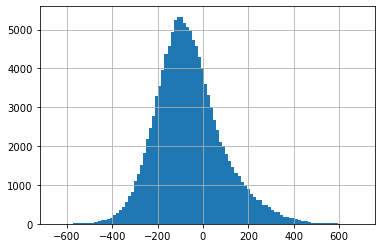

In [49]:
df['theta'].hist(bins = 100)

In [50]:
X_s = df_sin_outliers.drop('Particle', axis = 1).values
y_s = df_sin_outliers['Particle'].values

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size = 0.5, random_state = RANDOM_STATE, shuffle = True)

quickRF_s = RandomForestClassifier(random_state = RANDOM_STATE, n_jobs = -1)
quickRF_s.fit(X_s_train, y_s_train)
preds_s = quickRF_s.predict(X_s_test)
print(classification_report(y_s_test, quickRF_s))

              precision    recall  f1-score   support

           0       0.91      0.85      0.87     13049
           1       0.76      0.79      0.78      9939
           2       0.89      0.83      0.86     16707
           3       0.76      0.78      0.77      6410
           4       0.08      0.68      0.15        77
           5       0.29      0.78      0.42       298
           6       0.03      0.88      0.06        17

    accuracy                           0.82     46497
   macro avg       0.53      0.80      0.56     46497
weighted avg       0.84      0.82      0.83     46497



In [52]:
quickRF_s.feature_importances_

array([0.21104624, 0.03444375, 0.09011553, 0.12139748, 0.08292944,
       0.03446576, 0.08681005, 0.034816  , 0.14737437, 0.12214949,
       0.03445189])

In [54]:
df_knn = pd.DataFrame(X_knn, columns = df.columns[:-1])
df_knn.head()


,alpha_1,alpha_2,alpha_3,beta_1,beta_2,beta_3,gamma_1,gamma_2,gamma_3,theta,noise
0,-150.406980,-59.730861,396.928620,9.761703,-137.558889,159.598109,-137.558889,53.930955,154.713810,-232.436087,99.243140
1,147.781782,153.729532,111.998962,-174.941235,-97.888332,26.493593,-97.888332,-30.506871,-166.347802,-195.010710,20.242743
2,242.220616,82.947635,-102.073856,116.334349,-101.746729,176.452823,-101.746729,-33.419984,44.082548,-173.928682,3.806943
3,140.542086,-110.129037,215.560355,-11.927860,-11.257902,21.648833,-11.257902,240.685680,133.441269,-276.382025,0.336025
4,169.367809,-92.182925,159.995515,-272.230740,-80.483153,-97.698901,-80.483153,16.251613,-13.177148,-100.316959,24.459551


<AxesSubplot:>

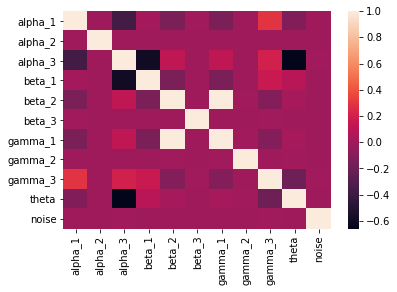

In [55]:
sns.heatmap(df_knn.corr())

In [56]:
df_knn.corr()


,alpha_1,alpha_2,alpha_3,beta_1,beta_2,beta_3,gamma_1,gamma_2,gamma_3,theta,noise
alpha_1,1.000000,-0.000464,-0.361094,0.012058,-0.138385,0.004825,-0.138374,0.000150,0.290984,-0.120403,0.001375
alpha_2,-0.000464,1.000000,0.001051,0.000253,-0.004762,0.000479,-0.004744,-0.000795,-0.000117,-0.001648,0.001311
alpha_3,-0.361094,0.001051,1.000000,-0.584323,0.122671,-0.000582,0.122683,-0.003739,0.209715,-0.657975,0.004392
beta_1,0.012058,0.000253,-0.584323,1.000000,-0.135089,-0.000757,-0.135118,-0.000672,0.159985,0.098229,-0.000839
beta_2,-0.138385,-0.004762,0.122671,-0.135089,1.000000,-0.003264,0.999984,0.004017,-0.101374,0.023044,0.002103
beta_3,0.004825,0.000479,-0.000582,-0.000757,-0.003264,1.000000,-0.003263,-0.005314,0.007143,0.001030,-0.001953
gamma_1,-0.138374,-0.004744,0.122683,-0.135118,0.999984,-0.003263,1.000000,0.003997,-0.101401,0.023029,0.002128
gamma_2,0.000150,-0.000795,-0.003739,-0.000672,0.004017,-0.005314,0.003997,1.000000,-0.004881,0.004688,0.000236
gamma_3,0.290984,-0.000117,0.209715,0.159985,-0.101374,0.007143,-0.101401,-0.004881,1.000000,-0.196065,0.004365
theta,-0.120403,-0.001648,-0.657975,0.098229,0.023044,0.001030,0.023029,0.004688,-0.196065,1.000000,-0.004365


In [57]:
df_knn_2 = df_knn.drop(['alpha_2', 'beta_3', 'gamma_2', 'noise'], axis = 1)

In [66]:
X_knn_train_2, X_knn_test_2, y_knn_train_2, y_knn_test_2 = train_test_split(df_knn_2, y, test_size = 0.5, random_state = RANDOM_STATE)
rf_bal = RandomForestClassifier(class_weight = 'balanced', n_estimators = 1000, random_state = RANDOM_STATE)
rf_norm = RandomForestClassifier( n_estimators = 1000, random_state = RANDOM_STATE)



In [67]:
pred_bal = rf_bal.fit(X_knn_train_2, y_knn_train_2).predict(X_knn_test_2)
pred_norm = rf_norm.fit(X_knn_train_2, y_knn_train_2).predict(X_knn_test_2)

print(classification_report(y_knn_test_2, pred_bal))



              precision    recall  f1-score   support

           0       0.83      0.90      0.86     16027
           1       0.79      0.77      0.78     13743
           2       0.82      0.89      0.85     21003
           3       0.77      0.77      0.77      8875
           4       0.61      0.10      0.18       832
           5       0.76      0.30      0.44      1138
           6       0.89      0.06      0.11       587
           7       0.82      0.33      0.47      1456

    accuracy                           0.81     63661
   macro avg       0.79      0.51      0.56     63661
weighted avg       0.80      0.81      0.80     63661



In [68]:
print(classification_report(y_knn_test_2, pred_norm))

              precision    recall  f1-score   support

           0       0.84      0.90      0.86     16027
           1       0.78      0.77      0.77     13743
           2       0.82      0.89      0.85     21003
           3       0.77      0.77      0.77      8875
           4       0.61      0.09      0.16       832
           5       0.76      0.30      0.43      1138
           6       0.88      0.05      0.09       587
           7       0.81      0.33      0.47      1456

    accuracy                           0.81     63661
   macro avg       0.78      0.51      0.55     63661
weighted avg       0.80      0.81      0.80     63661

